In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# ---------------- LOAD DATA ----------------
df = pd.read_excel("Salary Data 14.xlsx")
print("\n--- First 5 Rows ---")
print(df.head())

# ---------------- HANDLE MISSING VALUES ----------------
df = df.dropna()   # simple clean (removes rows with empty cells)

# ---------------- ONE-HOT ENCODING ----------------
df_encoded = pd.get_dummies(df, columns=["Gender", "Education Level", "Job Title"], drop_first=True).astype(float)

print("\n--- After Encoding ---")
print(df_encoded.head(2))

# ---------------- FEATURES & TARGET ----------------
X = df_encoded.drop("Salary", axis=1).values
y = df_encoded["Salary"].values.reshape(-1,1)

# ---------------- ADD BIAS COLUMN ----------------
X_b = np.hstack([np.ones((X.shape[0],1)), X])

# ---------------- NORMAL EQUATION ----------------
beta = np.linalg.pinv(X_b) @ y
print("\nModel Coefficients (β values):\n", beta)

# ---------------- PREDICTION FUNCTION ----------------
def predict(X_input):
    X_input = np.hstack([np.ones((X_input.shape[0],1)), X_input])
    return X_input @ beta

# ---------------- TRAINING PERFORMANCE ----------------
y_pred = predict(X)
mse = np.mean((y - y_pred)**2)
r2 = 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))

print("\nTraining MSE:", mse)
print("Training R²:", r2)

# ---------------- 5-FOLD CROSS VALIDATION ----------------
kf = KFold(n_splits=5, shuffle=True, random_state=1)
mse_scores = []
r2_scores = []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    X_train_b = np.hstack([np.ones((X_train.shape[0],1)), X_train])
    X_test_b = np.hstack([np.ones((X_test.shape[0],1)), X_test])

    beta_fold = np.linalg.pinv(X_train_b) @ y_train
    y_pred_fold = X_test_b @ beta_fold

    mse_fold = np.mean((y_test - y_pred_fold)**2)
    r2_fold = 1 - (np.sum((y_test - y_pred_fold)**2) / np.sum((y_test - np.mean(y_test))**2))

    mse_scores.append(mse_fold)
    r2_scores.append(r2_fold)

print("\n--- 5-Fold Cross Validation ---")
print("MSE Scores:", mse_scores)
print("Average MSE:", np.mean(mse_scores))
print("\nR² Scores:", r2_scores)
print("Average R²:", np.mean(r2_scores))

# ---------------- SAMPLE USER PREDICTION ----------------
sample = pd.DataFrame({
    "Age": [30],
    "Gender": ["Male"],
    "Education Level": ["Master"],
    "Job Title": ["Software Engineer"],
    "Years of Experience": [6]
})

sample_encoded = pd.get_dummies(sample, columns=["Gender", "Education Level", "Job Title"])

sample_encoded = sample_encoded.reindex(columns=df_encoded.drop("Salary", axis=1).columns, fill_value=0)


sample_pred = predict(sample_encoded.values)
print("\nPredicted Salary for Sample:", sample_pred[0][0])




--- First 5 Rows ---
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  

--- After Encoding ---
    Age  Years of Experience   Salary  Gender_Male  Education Level_Master's  \
0  32.0                  5.0  90000.0          1.0                       0.0   
1  28.0                  3.0  65000.0          0.0                       1.0   

   Education Level_PhD  Job Title_Accountant  \
0                  0.0                   0.0   
1                  0.0                   0.0   

   Job Title_Administrative Assis

Slope (m): 6844.510514484164
Intercept (c): 31921.216917044236


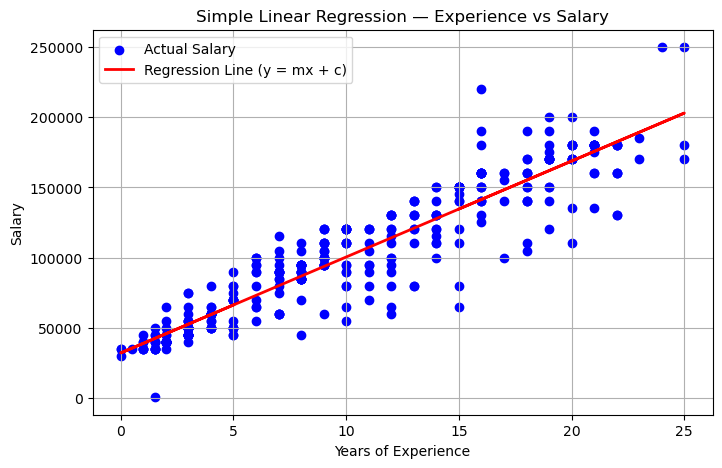

In [15]:
# ---------------- SIMPLE LINEAR REGRESSION (NO BIAS, NO PINV) ----------------
# Use only Years of Experience for visualization
x = df_encoded["Years of Experience"].values
y = df_encoded["Salary"].values

# Compute means
x_mean = np.mean(x)
y_mean = np.mean(y)

# Compute slope (m)
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean)**2)
m = numerator / denominator

# Compute intercept (c)
c = y_mean - m * x_mean

print("Slope (m):", m)
print("Intercept (c):", c)

# Predict salary values for the line
y_line = m * x + c

# ---------------- PLOT ----------------
plt.figure(figsize=(8,5))
plt.scatter(x, y, label="Actual Salary", color="blue")
plt.plot(x, y_line, color="red", linewidth=2, label="Regression Line (y = mx + c)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Simple Linear Regression — Experience vs Salary")
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# ---------------- SIMPLE LINEAR REGRESSION USING y = mx + c ----------------
# Use only Years of Experience for simple regression
x = df_encoded["Years of Experience"].values.reshape(-1,1)
y = df_encoded["Salary"].values.reshape(-1,1)

# Calculate slope (m) and intercept (c)
x_mean = np.mean(x)
y_mean = np.mean(y)

numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean)**2)

m = numerator / denominator   # slope
c = y_mean - m * x_mean       # intercept

print("\nSlope (m):", m)
print("Intercept (c):", c)

# Prediction function only for simple regression
def predict_simple(x_vals):
    return m * x_vals + c

# Predictions for whole dataset
y_pred_simple = predict_simple(x)



Slope (m): 6844.510514484164
Intercept (c): 31921.216917044236


In [10]:
mse_simple = np.mean((y - y_pred_simple)**2)
r2_simple = 1 - np.sum((y - y_pred_simple)**2) / np.sum((y - y_mean)**2)

print("\nSimple Regression MSE:", mse_simple)
print("Simple Regression R²:", r2_simple)



Simple Regression MSE: 312090043.799001
Simple Regression R²: 0.865528278393677


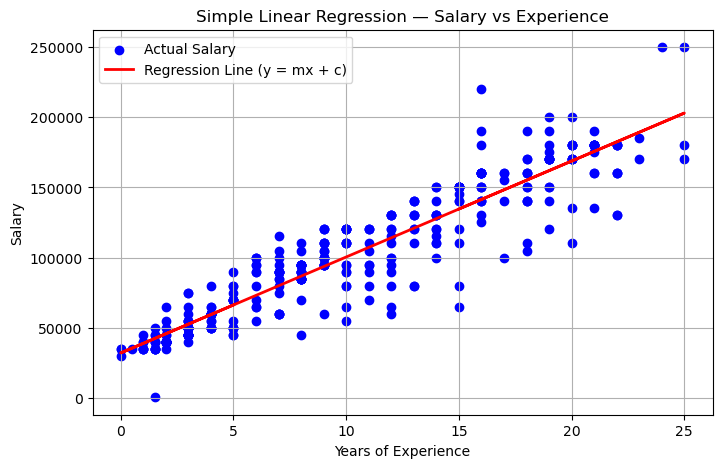

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, color="blue", label="Actual Salary")
plt.plot(x, y_pred_simple, color="red", label="Regression Line (y = mx + c)", linewidth=2)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Simple Linear Regression — Salary vs Experience")
plt.legend()
plt.grid(True)
plt.show()


In [14]:
years = 6  # example input
predicted_salary_simple = m * years + c
print("\nPredicted Salary (Simple Model):", predicted_salary_simple)



Predicted Salary (Simple Model): 72988.28000394921
